In [42]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
indicepanel = pd.read_csv('indicepanel.csv')

In [44]:
indicepanel.head()

,Date,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,2008-01-04,-1.570008,-1.529998,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
1,2008-01-07,-1.529998,0.270004,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2,2008-01-08,0.270004,-2.990006,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
3,2008-01-09,-2.990006,0.589997,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
4,2008-01-10,0.589997,1.100006,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


In [45]:
test = indicepanel.iloc[-2000:-1000, :]
train = indicepanel.iloc[-1000:, :]

print(train.shape, test.shape)

(1000, 12) (1000, 12)


In [46]:
formula = 'spy~spy_lag+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=train).fit()

In [47]:
train['PredictedY'] = lm.predict(train)
test['PredictedY'] = lm.predict(test)

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Profit of Signal-based strategy

In [48]:
train['Order'] = [1 if sig>0 else -1 for sig in train['PredictedY']]
train['Profit'] = train['spy']*train['Order']

train['Wealth'] = train['Profit'].cumsum()

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [49]:
print('Total Profit: ', train['Profit'].sum())

Total Profit:  275.7098120000004


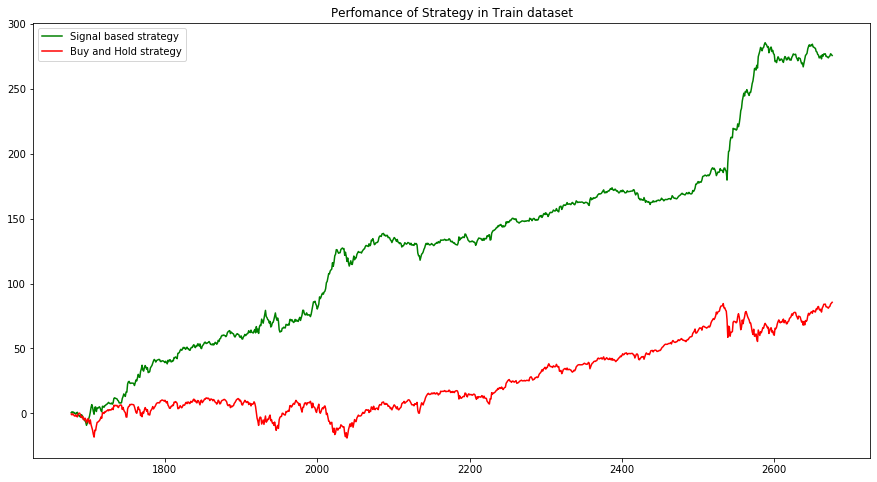

In [50]:
plt.figure(figsize=(15,8))
plt.title('Perfomance of Strategy in Train dataset')
plt.plot(train['Wealth'], color='g', label='Signal based strategy')
plt.plot(train['spy'].cumsum(), color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [51]:
test['Order'] = [1 if sig>0 else -1 for sig in test['PredictedY']]
test['Profit'] = test['spy']*test['Order']

test['Wealth'] = test['Profit'].cumsum()

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [52]:
print('Total Profit: ', test['Profit'].sum())

Total Profit:  182.50005700000122


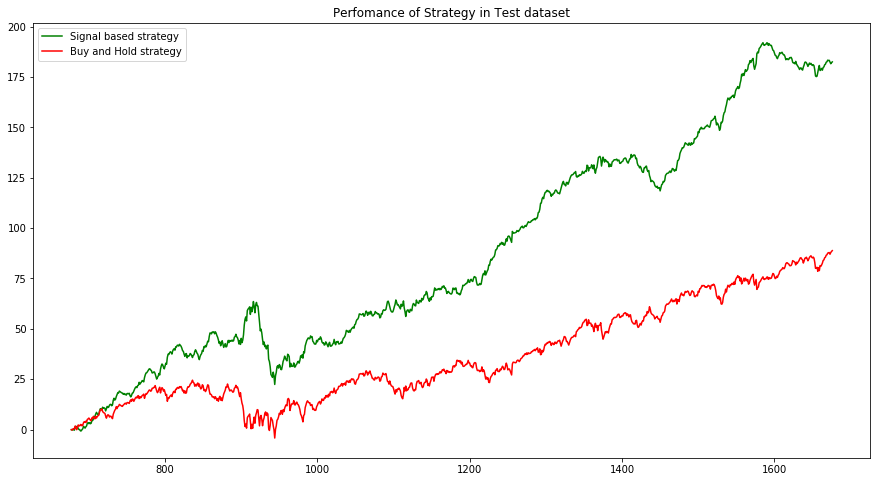

In [53]:
plt.figure(figsize=(15,8))
plt.title('Perfomance of Strategy in Test dataset')
plt.plot(test['Wealth'], color='g', label='Signal based strategy')
plt.plot(test['spy'].cumsum(), color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# Evaluation of model - Practical Standard

We introduce two common practical standards - **Sharpe Ratio**, **Maximum Drawdown** to evaluate our model performance


In [54]:
train.head()

,Date,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY,Order,Profit,Wealth
1677,2014-09-03,0.410004,-0.540009,-0.500000,17.720215,-30.17969,5.260254,15.869140,-2.299804,531.910156,-69.440430,201.380005,-0.252686,-1,0.540009,0.540009
1678,2014-09-04,-0.540009,-0.669998,-1.899902,-28.620117,16.36915,14.500000,50.410157,-22.500000,29.480469,-25.430664,200.839996,-0.221828,-1,0.669998,1.210007
1679,2014-09-05,-0.669998,0.750000,-3.670044,-20.890137,-17.71875,83.750000,122.810546,-33.200196,-116.410156,-123.959960,200.169998,-0.505648,-1,-0.750000,0.460007
1680,2014-09-08,0.750000,-0.509994,9.170044,18.430176,65.82031,-8.510254,53.660157,-20.000000,-102.640625,-13.019531,200.919998,-0.110891,-1,0.509994,0.970001
1681,2014-09-09,-0.509994,-0.980011,-6.440064,9.770019,-21.32031,-19.299804,-30.340821,29.700195,-102.640625,-46.669922,200.410004,0.451382,1,-0.980011,-0.010010


In [57]:
train.loc[train.index[0], 'Price']

201.380005

In [58]:
train['Wealth'] = train['Wealth'] + train.loc[train.index[0], 'Price']

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
train.head()

,Date,spy_lag,spy,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY,Order,Profit,Wealth
1677,2014-09-03,0.410004,-0.540009,-0.500000,17.720215,-30.17969,5.260254,15.869140,-2.299804,531.910156,-69.440430,201.380005,-0.252686,-1,0.540009,403.300019
1678,2014-09-04,-0.540009,-0.669998,-1.899902,-28.620117,16.36915,14.500000,50.410157,-22.500000,29.480469,-25.430664,200.839996,-0.221828,-1,0.669998,403.970017
1679,2014-09-05,-0.669998,0.750000,-3.670044,-20.890137,-17.71875,83.750000,122.810546,-33.200196,-116.410156,-123.959960,200.169998,-0.505648,-1,-0.750000,403.220017
1680,2014-09-08,0.750000,-0.509994,9.170044,18.430176,65.82031,-8.510254,53.660157,-20.000000,-102.640625,-13.019531,200.919998,-0.110891,-1,0.509994,403.730011
1681,2014-09-09,-0.509994,-0.980011,-6.440064,9.770019,-21.32031,-19.299804,-30.340821,29.700195,-102.640625,-46.669922,200.410004,0.451382,1,-0.980011,402.750000


In [60]:
test['Wealth'] = test['Wealth'] + test.loc[test.index[0], 'Price']

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Sharpe Ratio

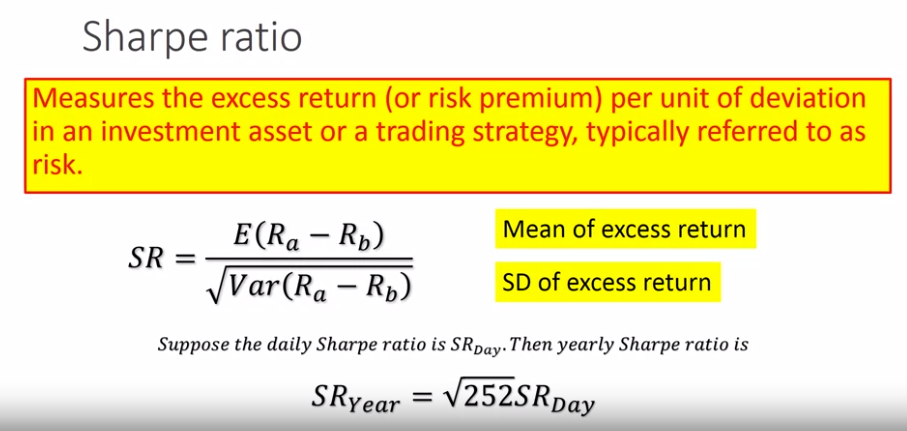

In [74]:
from IPython.display import Image
Image('sharpe ratio.PNG')

252 because of 252 trading days

In [61]:
train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
DailyReturn = train['Return'].dropna()

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
DailyReturn.head()

1678    0.001660
1679   -0.001858
1680    0.001264
1681   -0.002430
1682    0.000397
Name: Return, dtype: float64

In [64]:
print('Daily Sharpe Ratio is: ', DailyReturn.mean()/DailyReturn.std(ddof=1))
print('Yearly Sharpe Ratio is: ', (252)**0.5*DailyReturn.mean()/DailyReturn.std(ddof=1) )

Daily Sharpe Ratio is:  0.15878400583547944
Yearly Sharpe Ratio is:  2.520617949691844


In [65]:
# Sharpe Ratio in test data
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr = test['Return'].dropna()


C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.13600635388735152
Yearly Sharpe Ratio is  2.1590339346634497


# Maximum Drawdown

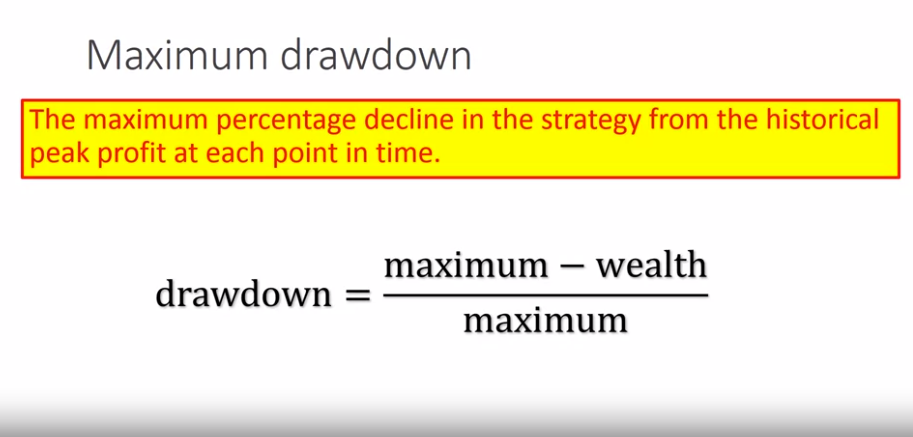

In [75]:
Image('Maximum drawdown.PNG')

In [69]:
# on train dataset
train['Peak'] = train['Wealth'].cummax()
train['Drawdown'] = (train['Peak'] - train['Wealth'])/ train['Peak']

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
print('Maximun Drawdown in train is: ', train['Drawdown'].max())

Maximun Drawdown in train is:  0.038089247133670526


In [71]:
# on test dataset
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth'])/ test['Peak']

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
print('Maximun Drawdown in test is: ', test['Drawdown'].max())

Maximun Drawdown in test is:  0.2337175885584984
